In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading a list of names for the text files containing storm event data
txtfile = open("flist.txt")
flist = txtfile.read().split('\n')
flist=flist[:-1]
flist=list(reversed(flist))
flist=flist[:22]

In [3]:
def value_to_float(val):
    if type(val) == int or type(val) == float:
        return val
    if 'B' in val:
        return float(val.replace('B', '')) * 10**9
    if 'M' in val:
        if len(val) > 1:
            return float(val.replace('M', '')) * 10**6
        return 1000000.0
    if 'K' in val:
        if len(val) > 1:
            return float(val.replace('K', '')) * 10**3
        return 1000.0
    return 0.0


In [4]:
f = ['EVENT_TYPE','DAMAGE_PROPERTY','DAMAGE_CROPS','INJURIES_DIRECT','INJURIES_INDIRECT','DEATHS_DIRECT','DEATHS_INDIRECT']

In [5]:
#For loop to generate a dataframe with data from all csv files
i=0
for file in flist:
	df=pd.read_csv(file, usecols=f)
	df.DAMAGE_PROPERTY = df.DAMAGE_PROPERTY.apply(value_to_float)
	df.DAMAGE_CROPS = df.DAMAGE_CROPS.apply(value_to_float)
	gp=df.groupby('EVENT_TYPE')
	D=gp.DAMAGE_PROPERTY.sum().fillna(0).reset_index()
	D['DAMAGE_CROPS']=gp.DAMAGE_CROPS.sum().fillna(0).reset_index().DAMAGE_CROPS
	C=gp.DEATHS_DIRECT.sum().fillna(0).reset_index()
	C['INJURIES_DIRECT']=gp.INJURIES_DIRECT.sum().fillna(0).reset_index().INJURIES_DIRECT
	if i==0:
		fullD=D
		fullC=C
	else:
		fullD=pd.merge(fullD,D,on='EVENT_TYPE',how='outer')
		fullC=pd.merge(fullC,C,on='EVENT_TYPE',how='outer')
	i+=1


In [6]:
nlist=list(range(1,fullD.shape[1]))
evenlist = [x for x in nlist if x % 2 == 0]
oddlist = [x for x in nlist if x % 2 != 0]

In [7]:
fullD['TOTAL_DP']=fullD.iloc[0:len(fullD),oddlist].sum(axis=1)
fullD['TOTAL_DC']=fullD.iloc[0:len(fullD),evenlist].sum(axis=1)
fullC['TOTAL_D']=fullC.iloc[0:len(fullC),oddlist].sum(axis=1)
fullC['TOTAL_I']=fullC.iloc[0:len(fullC),evenlist].sum(axis=1)
fullD['TOTAL_DAMAGE']=fullD['TOTAL_DP']+fullD['TOTAL_DC']
fullC['TOTAL_CASUALTIES']=fullC['TOTAL_D']+fullC['TOTAL_I']

In [8]:
Dplot=fullD.sort_values('TOTAL_DAMAGE').set_index('EVENT_TYPE').reset_index()
Dplot=Dplot[-10:]
Cplot=fullC.sort_values('TOTAL_CASUALTIES').set_index('EVENT_TYPE').reset_index()
Cplot=Cplot[-10:]

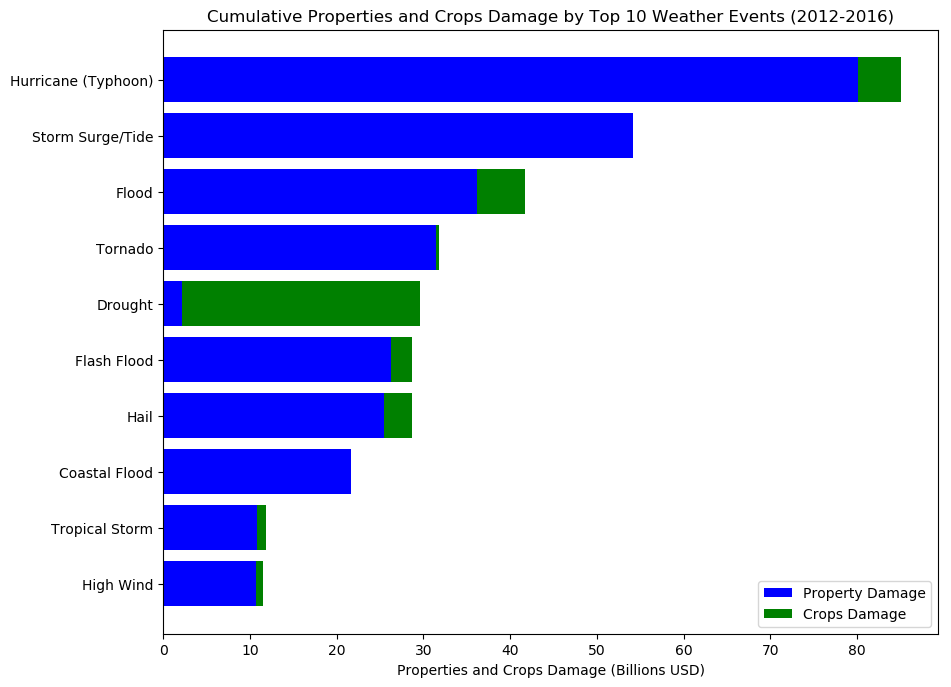

In [9]:
w=0.8
tlabel=Dplot.EVENT_TYPE
fig = plt.figure(figsize=(10,8), dpi=100)
p1 = plt.barh(Dplot.index, Dplot.TOTAL_DP.div(10**9), w, color='b', tick_label=tlabel)
p2 = plt.barh(Dplot.index, Dplot.TOTAL_DC.div(10**9), w, color='g', tick_label=tlabel, left=Dplot.TOTAL_DP.div(10**9))
plt.title('Cumulative Properties and Crops Damage by Top 10 Weather Events (2012-2016)')
plt.xlabel('Properties and Crops Damage (Billions USD)')
plt.legend(['Property Damage', 'Crops Damage'], loc='lower right')
plt.show()

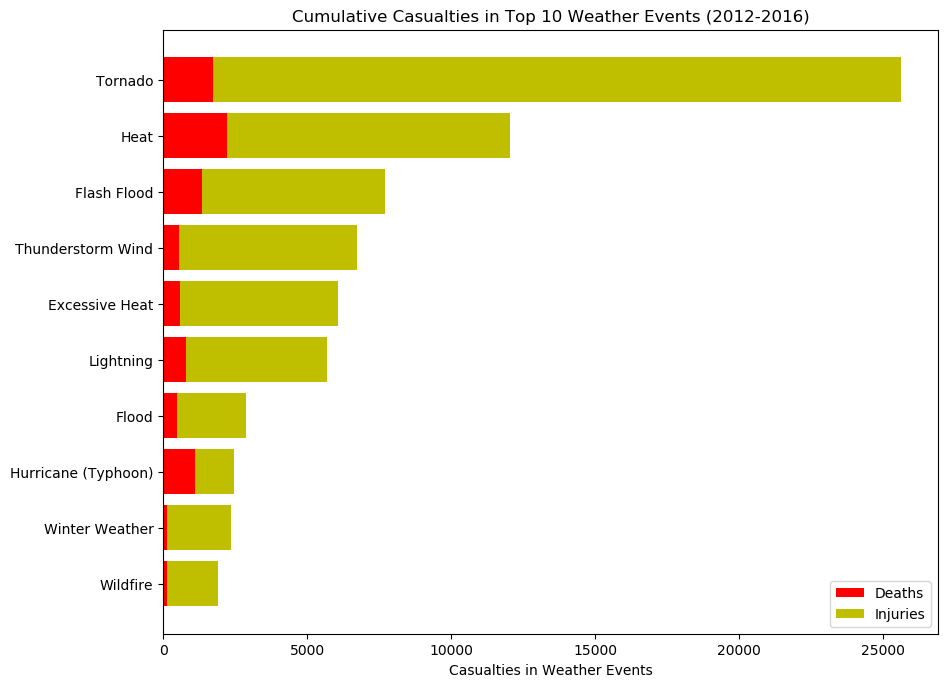

In [10]:
w=0.8
tlabel=Cplot.EVENT_TYPE
fig = plt.figure(figsize=(10,8), dpi=100)
p1 = plt.barh(Cplot.index, Cplot.TOTAL_D, w, color='r', tick_label=tlabel)
p2 = plt.barh(Cplot.index, Cplot.TOTAL_I, w, color='y', tick_label=tlabel, left=Cplot.TOTAL_D)
plt.title('Cumulative Casualties in Top 10 Weather Events (2012-2016)')
plt.xlabel('Casualties in Weather Events')
plt.legend(['Deaths', 'Injuries'], loc='lower right')
plt.show()